<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_1_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


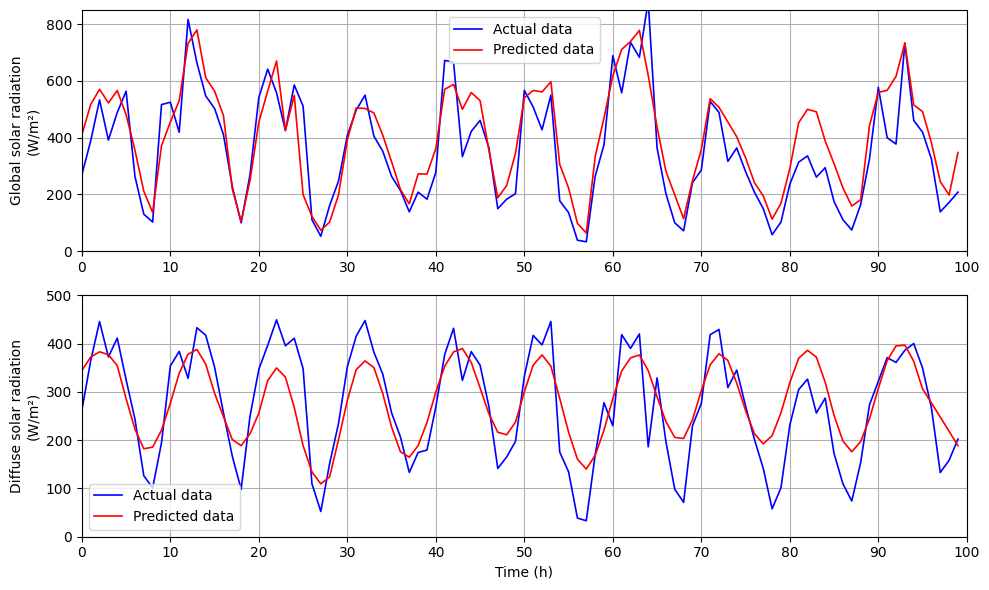

In [10]:
#Example 1.9
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.signal import savgol_filter

file_path = '/content/PV Modeling Book Data Source.xls'
sheet_name = 'Source 1'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract training data (rows 5 to 2997)
G_T = data.iloc[4:2997, 4].values
G_D = data.iloc[4:2997, 5].values
Hum = data.iloc[4:2997, 7].values
T = data.iloc[4:2997, 9].values
S = data.iloc[4:2997, 8].values
M = data.iloc[4:2997, 0].values
D = data.iloc[4:2997, 1].values
H = data.iloc[4:2997, 3].values

# Extract testing data (rows 2998 to 3640)
G_T_Test = data.iloc[2997:3640, 4].values
G_D_Test = data.iloc[2997:3640, 5].values
Hum_Test = data.iloc[2997:3640, 7].values
T_Test = data.iloc[2997:3640, 9].values
S_Test = data.iloc[2997:3640, 8].values
M_Test = data.iloc[2997:3640, 0].values
D_Test = data.iloc[2997:3640, 1].values
H_Test = data.iloc[2997:3640, 3].values


inputs = np.array([M, D, H, T, Hum, S]).T
targets = np.array([G_T, G_D]).T
test_inputs = np.array([M_Test, D_Test, H_Test, T_Test, Hum_Test, S_Test]).T


net = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, solver='adam', random_state=42)
)

# Train the model
net.fit(inputs, targets)

# Predict
G_Mi = net.predict(test_inputs)
G_Tp = G_Mi[:, 0]
G_Dp = G_Mi[:, 1]


G_Dp_smooth = savgol_filter(G_Dp[:100], window_length=9, polyorder=2)

# Plotting first 100 points
x_range = np.arange(0, 100)

plt.figure(figsize=(10, 6))

# Global radiation
plt.subplot(2, 1, 1)
plt.plot(x_range, G_T_Test[:100], 'b-', linewidth=1.2, label='Actual data')
plt.plot(x_range, G_Tp[:100], 'r-', linewidth=1.2, label='Predicted data')
plt.ylabel('Global solar radiation\n(W/m²)')
plt.xticks(np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(0, 850)
plt.grid(True)
plt.legend()

# Diffuse radiation
plt.subplot(2, 1, 2)
plt.plot(x_range, G_D_Test[:100], 'b-', linewidth=1.2, label='Actual data')
plt.plot(x_range, G_Dp_smooth, 'r-', linewidth=1.2, label='Predicted data')
plt.xlabel('Time (h)')
plt.ylabel('Diffuse solar radiation\n(W/m²)')
plt.xticks(np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
